<h1>EDA on Student performance</h1>

In [1]:
import pandas as pd

In [2]:
path="D:\StudentsPerformance.csv"
df=pd.read_csv(path)
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
headers=['S_no','Gender','Race/ethinicity','Parental level of education','Lunch','Test preperation score','Math score','Reading score','Writing score']
df.column=headers
df.head(10)

C:\Users\hersh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


<h2>analysing data </h2>

In [4]:
print(df.shape)

(1000, 8)


In [5]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df.describe(include=['object'])

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


In [8]:
df.dropna(axis=0,inplace=True)

In [9]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


<h3>checking Nan values in each column</h3>

In [10]:
print('Number of Nan values in gender:',df['math score'].isnull().sum())
print('Number of Nan values in reading score:',df['reading score'].isnull().sum())
print('Number of Nan values in writing score:',df['writing score'].isnull().sum())
print('Number of Nan values in gender:',df['gender'].isnull().sum())
print('Number of Nan values in race/ethnicity:',df['race/ethnicity'].isnull().sum())
print('Number of Nan values in parental level of education:',df['parental level of education'].isnull().sum())
print('Number of Nan values in lunch:',df['lunch'].isnull().sum())
print('Number of Nan values in test preparation course:',df['test preparation course'].isnull().sum())

Number of Nan values in gender: 0
Number of Nan values in reading score: 0
Number of Nan values in writing score: 0
Number of Nan values in gender: 0
Number of Nan values in race/ethnicity: 0
Number of Nan values in parental level of education: 0
Number of Nan values in lunch: 0
Number of Nan values in test preparation course: 0


In [11]:
gender=df.groupby(['gender'])
gender_count=gender['gender'].count()
gender_count

gender
female    518
male      482
Name: gender, dtype: int64

<h3>mean marks according to gender</h3>

In [12]:
df_group_one=df.groupby(['gender'],as_index=False).mean()
df_group_one

,gender,math score,reading score,writing score
0,female,63.633205,72.608108,72.467181
1,male,68.728216,65.473029,63.311203


In [13]:
race=df.groupby(['race/ethnicity'])
race_count=race['race/ethnicity'].count()
race_count

race/ethnicity
group A     89
group B    190
group C    319
group D    262
group E    140
Name: race/ethnicity, dtype: int64

<h3>mean marks according to ethnicity</h3>

In [14]:
df_group=df.groupby(['race/ethnicity'],as_index=False).mean()
df_group


,race/ethnicity,math score,reading score,writing score
0,group A,61.629213,64.674157,62.674157
1,group B,63.452632,67.352632,65.600000
2,group C,64.463950,69.103448,67.827586
3,group D,67.362595,70.030534,70.145038
4,group E,73.821429,73.028571,71.407143


In [15]:
parental=df.groupby(['parental level of education'])
parent_count=parental['parental level of education'].count()
parent_count

parental level of education
associate's degree    222
bachelor's degree     118
high school           196
master's degree        59
some college          226
some high school      179
Name: parental level of education, dtype: int64

<h3> mean marks according to parental education</h3>

In [16]:
df_parental=df.groupby(['parental level of education'],as_index=False).mean()
df_parental

,parental level of education,math score,reading score,writing score
0,associate's degree,67.882883,70.927928,69.896396
1,bachelor's degree,69.389831,73.000000,73.381356
2,high school,62.137755,64.704082,62.448980
3,master's degree,69.745763,75.372881,75.677966
4,some college,67.128319,69.460177,68.840708
5,some high school,63.497207,66.938547,64.888268


In [17]:
lunch=df.groupby(['lunch'])
lunch_count=lunch['lunch'].count()
lunch_count

lunch
free/reduced    355
standard        645
Name: lunch, dtype: int64

<h3>mean marks according to lunch category</h3> 

In [18]:
df_lunch=df.groupby(['lunch'],as_index=False).mean()
df_lunch

,lunch,math score,reading score,writing score
0,free/reduced,58.921127,64.653521,63.022535
1,standard,70.034109,71.654264,70.823256


In [19]:
test_course = df.groupby(['test preparation course'])
test_course_count=test_course['test preparation course'].count()
test_course_count

test preparation course
completed    358
none         642
Name: test preparation course, dtype: int64

<h3>mean marks for test prep courses</h3>

In [20]:
df_test=df.groupby(['test preparation course'],as_index=False).mean()
df_test

,test preparation course,math score,reading score,writing score
0,completed,69.695531,73.893855,74.418994
1,none,64.077882,66.534268,64.504673


In [21]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.0


In [22]:
df_plot1=df_group_one.head()
df_plot1

,gender,math score,reading score,writing score
0,female,63.633205,72.608108,72.467181
1,male,68.728216,65.473029,63.311203


<h3>Relation between marks of student and Gender</h3>

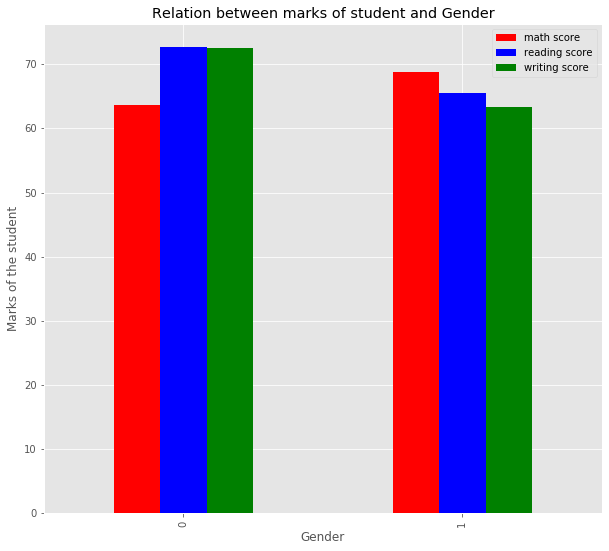

In [36]:
color_list=['red','blue','green']
df_plot1.plot(kind='bar',figsize=(10,9),color=color_list)

plt.title('Relation between marks of student and Gender')

plt.xlabel('Gender')
plt.ylabel('Marks of the student')
plt.show()

In [24]:
df_plot2=df_group.head()
df_plot2

,race/ethnicity,math score,reading score,writing score
0,group A,61.629213,64.674157,62.674157
1,group B,63.452632,67.352632,65.600000
2,group C,64.463950,69.103448,67.827586
3,group D,67.362595,70.030534,70.145038
4,group E,73.821429,73.028571,71.407143


<h3>Relation between ethnicity and student marks</h3>

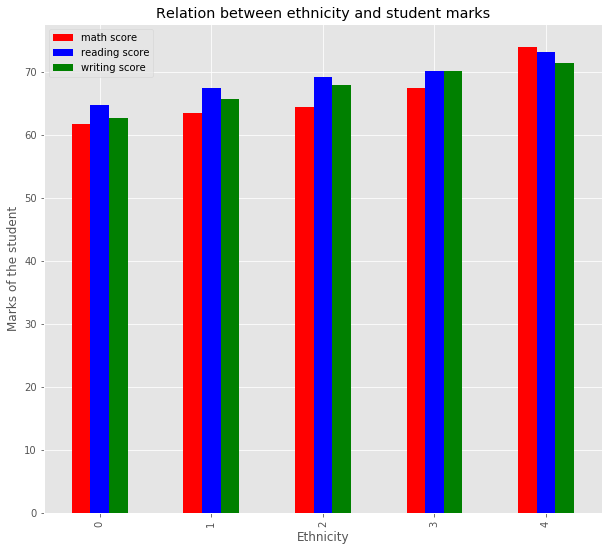

In [25]:
df_plot2.plot(kind='bar',figsize=(10,9),color=color_list)
plt.title('Relation between ethnicity and student marks')
plt.xlabel('Ethnicity')
plt.ylabel('Marks of the student')
plt.show()

In [26]:
df_plot3=df_parental.head()
df_plot3

,parental level of education,math score,reading score,writing score
0,associate's degree,67.882883,70.927928,69.896396
1,bachelor's degree,69.389831,73.000000,73.381356
2,high school,62.137755,64.704082,62.448980
3,master's degree,69.745763,75.372881,75.677966
4,some college,67.128319,69.460177,68.840708


<h3>Relation between parental education and student marks</h3>

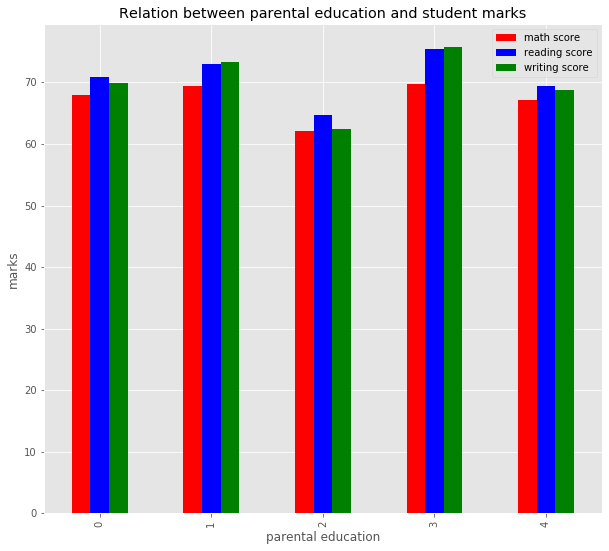

In [27]:
df_plot3.plot(kind='bar',figsize=(10,9),color=color_list)
plt.title('Relation between parental education and student marks')
plt.xlabel('parental education')
plt.ylabel('marks')
plt.show()

In [28]:
df_plot4=df_lunch.head()
df_plot4

,lunch,math score,reading score,writing score
0,free/reduced,58.921127,64.653521,63.022535
1,standard,70.034109,71.654264,70.823256


<h3>Relation between lunch and student marks</h3>

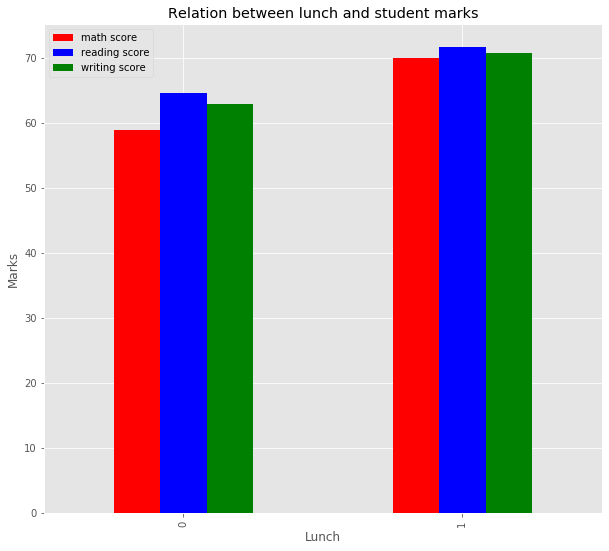

In [29]:
df_plot4.plot(kind='bar',figsize=(10,9),color=color_list)
plt.title('Relation between lunch and student marks')
plt.xlabel('Lunch')
plt.ylabel('Marks')
plt.show()              
              

In [30]:
df_plot5=df_test.head()
df_plot5

,test preparation course,math score,reading score,writing score
0,completed,69.695531,73.893855,74.418994
1,none,64.077882,66.534268,64.504673


<h3>Relation between the Test preparation and student marks</h3>

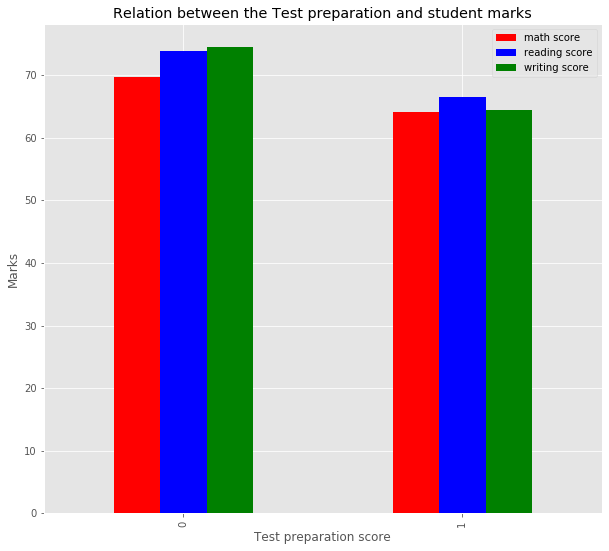

In [31]:
df_plot5.plot(kind='bar',figsize=(10,9),color=color_list)
plt.title('Relation between the Test preparation and student marks')
plt.xlabel('Test preparation score')
plt.ylabel('Marks')
plt.show()